# Capstone Project-The Battle of Neighbourhoods
## Studies on the best location for a French gastronomy restaurant

## Introduction

Catering is a major component of tourism in France and particularly in Paris. The purely gastronomic offer, recently listed as a World Heritage Site, arouses a legitimate expectation on the part of tourists, although it is the showcase for a much more varied catering offer, whether through fast food, sandwich shops, popular and international cuisine, etc.
This diversity is an opportunity that should be valued and even encouraged. But it raises difficulties, in particular that of considering the Parisian restaurant market as a whole and the fragmentation of the data available on this subject.

Chinese and American visitors are the biggest spenders on shopping in Paris and Ile-de-France. International customers alone generated around €2 billion for shopping in Paris and Ile-de-France: Chinese and American tourists total more than €500 million, with respectively €265 million and €246 million spent, followed by the Spanish (€85 million) and Japanese (€78 million).
Gastronomic catering represents the 6th largest expenditure item for tourists in France.

In other side Parisian cultural sites welcomed 70.2 million visitors in 2017. This represents an increase of 5.9% over 2016.
The cultural attendance survey, conducted each year by the Paris Convention and Visitors Bureau (OTCP), lists the attendance data for Paris museums and monuments (permanent collections and exhibitions) over the past year.  The 2017 survey covers 62 sites and 68 temporary exhibitions.
Notre-Dame de Paris Cathedral and the Basilica of the Sacré-Cœur de Montmartre are the two most visited monuments in the capital with 12 million and 10 million visitors respectively in 2017. Third in the ranking, the Louvre Museum is growing again with more than 8 million visitors and an increase of +14.8% compared to 2016. It remains the most visited museum in the world. The Eiffel Tower, with 6.2 million admissions in 2017 (+4.6%), has crossed the symbolic barrier of... 300 million visitors since the 1889 Universal Exhibition.
The cumulative attendance of the sites considered in this survey reached 70.2 million visitors, an increase of +5.9% compared to 2016.

The Top 5 of the number of visits to Parisian cultural sites in 2017
1 Notre-Dame de Paris Cathedral: 12,000,000,000
2 Basilica of the Sacred Heart of Montmartre: 10,000,000
3 Louvre Museum: 8,022,300
4 Eiffel Tower: 6,207,303
5 Centre Pompidou: 3,337,000

Our client, a gastronomic chef, would like to open a new gastronomic restaurant.
We therefore propose to help him to choose the best site in Paris while taking advantage of the tourist opportunities that the largest cultural sites in Paris can offer and we will study in this analysis the 5 most visited sites in Paris and their neightbourhoods.

## Data

For this project we will use the Fousquare API to identify the main venue in the neighborhood of the 5th more popular tourism site in Paris, arround 500 m to identify the different activity and identify classify them to help our client to better understand the local context.

We also use a data set available on kaggle based on data from TripAdvisor and allow us to have several complementary data like :
Cuisine Style: cuisine style(s) of the restaurant, in a Python list object (94 046 non-null)
Ranking: rank of the restaurant among the total number of restaurants in the city as a float object (115 645 non-null)
Rating: rate of the restaurant on a scale from 1 to 5, as a float object (115 658 non-null)
Price Range: price range of the restaurant among 3 categories , as a categorical type (77 555 non-null)
The dataset is avalaible here :
https://www.kaggle.com/damienbeneschi/krakow-ta-restaurans-data-raw/download/Z7HYhsoNPob8GBTNlhdy%2Fversions%2F27ds2CzTZzEGIkPGCDa9%2Ffiles%2FTA_restaurants_curated.csv?datasetVersionNumber=1

## Approach

The latitude and longitude of the top 5 tourism site are :
Notre Dame de Paris : 48.853, 2.349
Basilica of the Sacred Heart of Montmartre : 48.885, 2.337
Louvre Museum : 48.860, 2.338
Eiffel Tower : 48.858, 2.294
Centre Pompidou : 2.352, 48.86

Using foursquare API we will identify the differents venues in the 500m around these five locations and focus on the catering environnement.
In a second time we will add the data from Kaggle to measure competition in terms of quality and cost and help to choose the best emplacement.

Indeed, one wonders if it is interesting to settle in a neighborhood where the quality of the restaurant and average but at the risk of having a clientele less conducive to a gourmet restaurant.
On the other hand, our client may be preferred to settle in a neighborhood where gastronomy is already "queen" and where he will be sure to find the right clientele.

## Studies

### Import

In [1]:
import pandas as pd
import numpy as np
import requests 
from pandas.io.json import json_normalize 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

!pip install folium==0.5.0
import folium
!pip install geopy
from geopy.geocoders import Nominatim 
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

     |████████████████████████████████| 81kB 13.9MB/s eta 0:00:01
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
     |████████████████████████████████| 368kB 12.9MB/s eta 0:00:01


### Create a map of Paris

First we will propose a vizialization of the selected site on the map of Paris, therefore we will create a first data set containing the localisation information.

In [2]:
latlgn = np.array([['Notre Dame', 48.853, 2.349], ['Sacred Heart', 48.885, 2.337], ['Louvre Museum', 48.860, 2.338], ['Eiffel Tower', 48.858, 2.294], ['Centre Pompidou', 48.86, 2.352]])
df_ps = pd.DataFrame(latlgn, columns = ['Site','Latitude', 'Longitude'])
df_ps['Site'] = df_ps.Site.astype(str)
df_ps['Latitude'] = df_ps.Latitude.astype(float)
df_ps['Longitude'] = df_ps.Longitude.astype(float)

In [3]:
df_ps

,Site,Latitude,Longitude
0,Notre Dame,48.853,2.349
1,Sacred Heart,48.885,2.337
2,Louvre Museum,48.860,2.338
3,Eiffel Tower,48.858,2.294
4,Centre Pompidou,48.860,2.352


In [4]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="pa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566101, 2.3514992.


In [5]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, name in zip(df_ps['Latitude'], df_ps['Longitude'],df_ps['Site']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#f01633',
    fill_opacity=0.7,
    parse_html=False).add_to(map_Paris) 

In [6]:
map_Paris

This simple first step allow to identify that three sites on the five are closer.

### Define Foursquare Credentials and Version

First of all we will identify the location of the hotels which can of course constitute a pool of guests especially in the evening.

Then we will identify the location of the restaurants that will allow us to validate the environment and the nature of the competition. 

In [7]:
CLIENT_ID = 'HS3ZA2VWDAJDUVNBINV1LHYTRIDK0KUESPIRTG40RFYVNJM1' # your Foursquare ID
CLIENT_SECRET = 'NH0LDEWJ4UX11HESZLQT1G5IX3H0X3H032MJZX2NYVK3FIA3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Create a function to get the venue to all the neighborhoods

Below is a feature that allows us to scan the venues of our 5 locations.

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['touristic site', 
                  'touristic site Latitude', 
                  'touristic site Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
LIMIT = 100 
radius = 500
Paris_venues = getNearbyVenues(names=df_ps['Site'],
                                   latitudes=df_ps['Latitude'],
                                   longitudes=df_ps['Longitude']
                                  )

Notre Dame
Sacred Heart
Louvre Museum
Eiffel Tower
Centre Pompidou


We will create two new dataframe one for the restaurant category and the following of the studies and an other one to add the hotel on the map.

In [10]:
DF_Restaurant = Paris_venues[Paris_venues['Venue Category'].str.contains("Restaurant")]
DF_Restaurant.reset_index(inplace = True)
DF_Restaurant.drop(['index'], axis=1, inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
DF_Hotel = Paris_venues[Paris_venues['Venue Category'].str.contains("Hotel")]

In [12]:
# add markers to map
for lat, lng, name, categories in zip(DF_Restaurant['Venue Latitude'], DF_Restaurant['Venue Longitude'], 
                                      DF_Restaurant['Venue'], DF_Restaurant['Venue Category']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_Paris) 

In [13]:
# add markers to map
for lat, lng, name, categories in zip(DF_Hotel['Venue Latitude'], DF_Hotel['Venue Longitude'], 
                                      DF_Hotel['Venue'], DF_Hotel['Venue Category']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=5,
    popup=label,
    color='Yellow',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_Paris) 

In [14]:
map_Paris

We find that overall the density of hotel (in yellow on the map) is relatively close between the 3 areas with perhaps an advantage in the area of the Sacred Heart.
The density of restaurants (in blue on the map) is higher in the area of the Louvre museum, the Centre Pompidou and Notre Dame but this area includes as we have seen 3 tourists sites so also covers a wider area.

### Added dataset from Kaggle

In this step we will treat the data set from Kaggle en marge it with the venu identifying by foursquare.
We will import the data added in watson platform, retreated the name of the restaurant by suppressing accent and other specials characters etc... to improve the matching between the data set.

In [15]:
DF_Restaurant.drop(['touristic site Latitude', 'touristic site Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1, inplace = True)
DF_Restaurant.head()

,touristic site,Venue,Venue Category
0,Notre Dame,Sola,Japanese Restaurant
1,Notre Dame,Comme chai Toi,French Restaurant
2,Notre Dame,Le Petit Châtelet,French Restaurant
3,Notre Dame,La Nouvelle Seine,French Restaurant
4,Notre Dame,Sourire Tapas Françaises,Tapas Restaurant


In [16]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5ae9b024a5224142b226b33f97d67392 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='FgAKmXji6xz05PPaW7t2FsnriGm292WGwt3ZdgoWa2Ml',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5ae9b024a5224142b226b33f97d67392.get_object(Bucket='capstoneprojectthebattleofneighbo-donotdelete-pr-tke1zkqccgeuch',Key='TA_restaurants_curated_Paris.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_kaggle = pd.read_excel(body)
df_kaggle.head()


,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,La Meduse,Paris,"['French', 'Seafood', 'European', 'Vegetarian ...",1.0,5.0,45.0,178.0,"You can't figure out from the outside the..., ..."
1,Le Cappiello,Paris,"['French', 'Mediterranean', 'European', 'Conte...",2.0,5.0,45.0,208.0,"Incredible!', 'Amazing food, wonderful atmosph..."
2,ASPIC,Paris,['French'- 'European'- 'Contemporary'],3.0,5.0,70.0,427.0,"Second time and just as good', 'Best dinner in..."
3,Les Apotres de Pigalle,Paris,"['South American', 'Brew Pub', 'European', 'Ve...",4.0,5.0,45.0,1152.0,"Wonderful culinary experience', 'Must go resta..."
4,Epicure,Paris,['French'- 'European'- 'Vegetarian Friendly'- ...,5.0,5.0,70.0,2305.0,"Very nice place', 'Speechless',"


In [17]:
df_kaggle['Name'] = df_kaggle['Name'].str.upper() 

In [18]:
df_merge = DF_Restaurant
df_merge['Venue'] = df_merge['Venue'].str.lower() 
df_merge['Venue'] = df_merge['Venue'].str.replace(u"ç", "c")
df_merge['Venue'] = df_merge['Venue'].str.replace(u"é", "e")
df_merge['Venue'] = df_merge['Venue'].str.replace(u"è", "e")
df_merge['Venue'] = df_merge['Venue'].str.replace(u"î", "i")
df_merge['Venue'] = df_merge['Venue'].str.replace(u"ù", "u")
df_merge['Venue'] = df_merge['Venue'].str.replace(u"à", "a")
df_merge['Venue'] = df_merge['Venue'].str.replace(u"â", "a")

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [19]:
df_merge['Venue'] = df_merge['Venue'].str.upper() 
df_merge = df_merge.join(df_kaggle.set_index('Name'), on='Venue')


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
df_merge.isnull().sum() 

touristic site        0
Venue                 0
Venue Category        0
City                 35
Cuisine Style        40
Ranking              35
Rating               35
Price Range          43
Number of Reviews    35
Reviews              35
dtype: int64

In [22]:
df_merge.dropna(subset=['Ranking', 'Price Range'], inplace=True)
df_merge.columns = ['site', 'Venue', 'Category', 'City', 'Cuisine', 'Ranking', 'Rating', 'Price', 'Reviews', 'Comments']
df_merge.shape

(95, 10)

In [23]:
df_merge

,site,Venue,Category,City,Cuisine,Ranking,Rating,Price,Reviews,Comments
0,Notre Dame,SOLA,Japanese Restaurant,Paris,['Fusion'- 'French'- 'Japanese'- 'Vegetarian F...,189.0,4.5,70.0,664.0,"Birthday trip', 'A 1 presentation',"
2,Notre Dame,LE PETIT CHATELET,French Restaurant,Paris,"['French', 'European', 'Vegetarian Friendly']",247.0,4.5,45.0,1454.0,"Don't Miss It, 'Good experience',"
3,Notre Dame,LA NOUVELLE SEINE,French Restaurant,Paris,"['French', 'European']",10231.0,3.5,45.0,208.0,"Average food, very average', 'Friendly athmosp..."
4,Notre Dame,SOURIRE TAPAS FRANCAISES,Tapas Restaurant,Paris,"['French', 'European', 'Wine Bar', 'Vegetarian...",166.0,4.5,45.0,705.0,"Loved the flavours!!', 'Inventive French Small..."
5,Notre Dame,AU BOUGNAT,Auvergne Restaurant,Paris,"['French', 'Vegetarian Friendly']",335.0,4.5,45.0,1089.0,Unexpected gem near busy tourist attractio...'...
6,Notre Dame,LOUBNANE,Lebanese Restaurant,Paris,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",84.0,4.5,45.0,952.0,"Awesome restaurant, vibrant atmosphere!', 'Goo..."
8,Notre Dame,MIRAMA,Cantonese Restaurant,Paris,"['Chinese', 'Asian', 'Soups', 'Vegetarian Frie...",1528.0,4.0,45.0,439.0,"Authentic', 'Delicious!!',"
10,Notre Dame,LE MARMITON DE LUTECE,French Restaurant,Paris,"['French', 'European', 'Grill', 'Vegetarian Fr...",1514.0,4.0,45.0,559.0,"Light meal and good wine', 'Authentic French d..."
13,Notre Dame,LE FLORE EN L'ILE,French Restaurant,Paris,"['French', 'Gastropub', 'Vegetarian Friendly']",1538.0,4.0,45.0,365.0,"A trendy cafe/bistro with good service.', 'Del..."
14,Notre Dame,ANAHUACALLI,Mexican Restaurant,Paris,"['Mexican', 'Latin', 'Vegetarian Friendly']",3274.0,4.0,45.0,396.0,"Good Mexican Food in Paris!', 'Authentic Mexic..."


## Result

In [24]:
df_mean = df_merge.groupby('site').mean()

Text(0, 0.5, 'Rating')

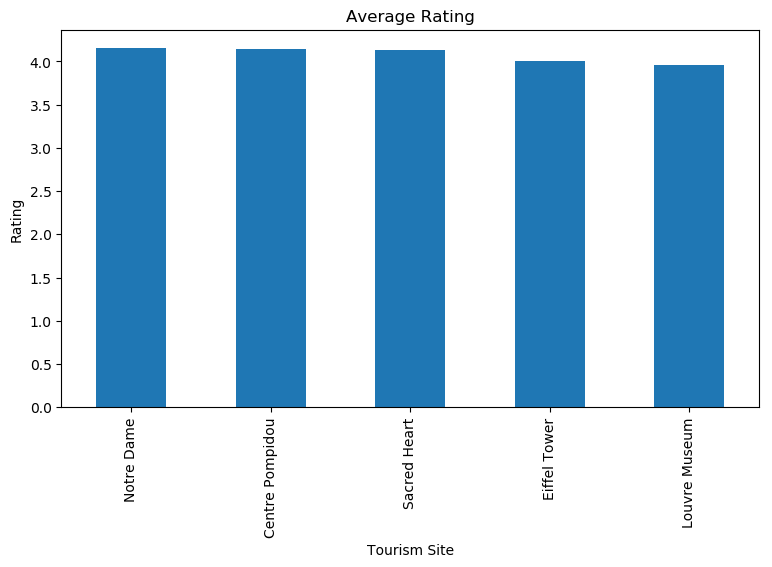

In [25]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average Rating')
#On x-axis

#giving a bar plot
df_mean.groupby('site')['Rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Tourism Site')
#On y-axis
plt.ylabel('Rating')

Overall the average ratings are comparable although we find that the first 3 sites have a higher average rating overall.

Text(0, 0.5, 'Price')

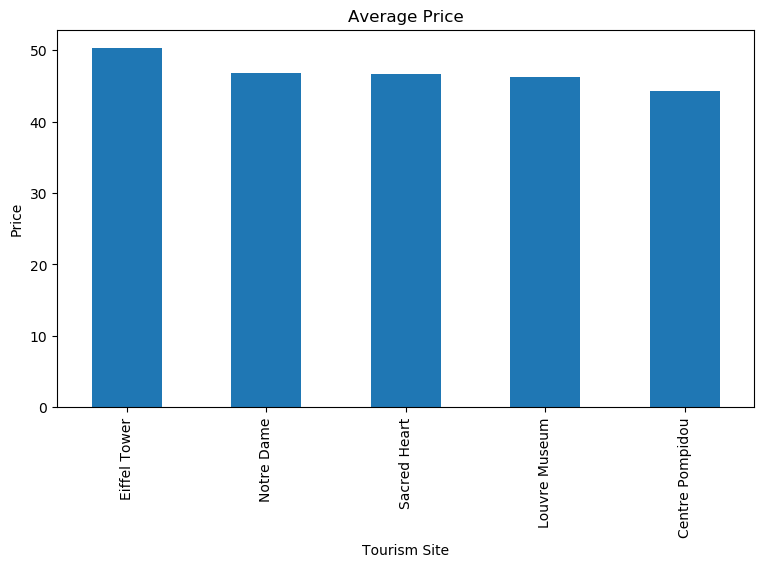

In [26]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average Price')
#On x-axis

#giving a bar plot
df_mean.groupby('site')['Price'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Tourism Site')
#On y-axis
plt.ylabel('Price')

Our approach to the average price remains questionable because we do not have a precise figure but we have an average price appreciation.
It is clear that once again the results remain close that the site of the Eiffel Tower is significantly above.

Text(0, 0.5, 'Price')

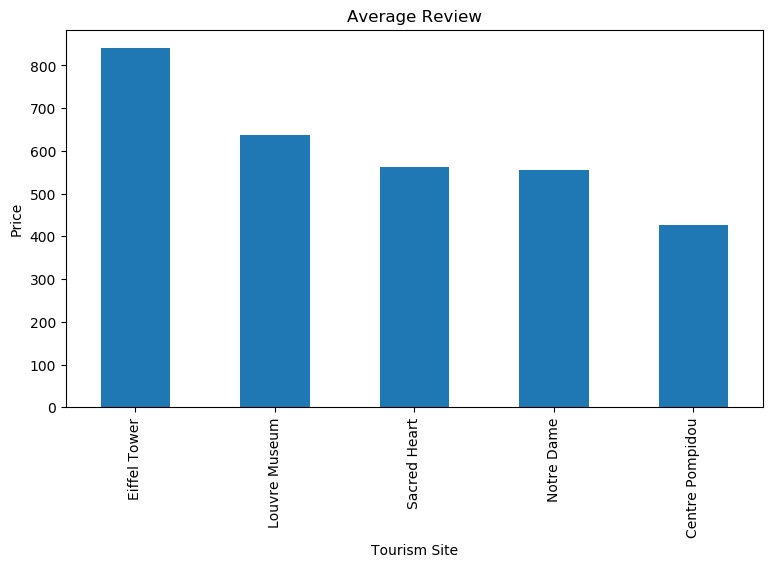

In [27]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average Review')
#On x-axis

#giving a bar plot
df_mean.groupby('site')['Reviews'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Tourism Site')
#On y-axis
plt.ylabel('Price')

If we take the average number of recommendations, we recall that this data comes from the trip advisor site it seems quite clear this time that the restaurants of the Eiffel Tower site get scans much more than on the other sites.
One can therefore think that the restaurants there are more visited /popular than those of other sites.

We then offer boxplots on the different ratings in order to get a better idea of their distribution.

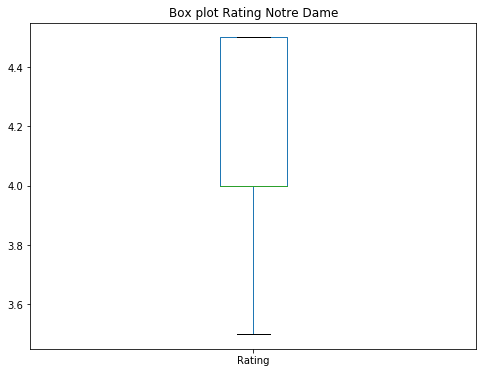

In [28]:
df_ND = df_merge.loc[df_merge['site'] == 'Notre Dame']
df_ND['Rating'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot Rating Notre Dame')
plt.show()

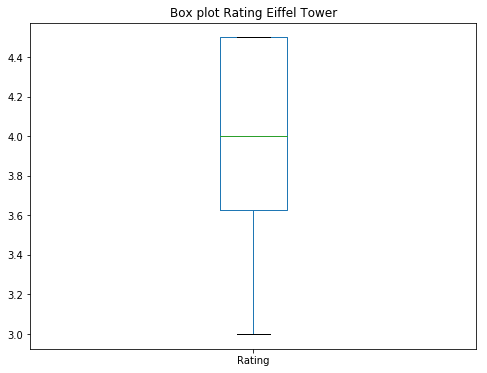

In [29]:
df_EI = df_merge.loc[df_merge['site'] == 'Eiffel Tower']
df_EI['Rating'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot Rating Eiffel Tower')
plt.show()

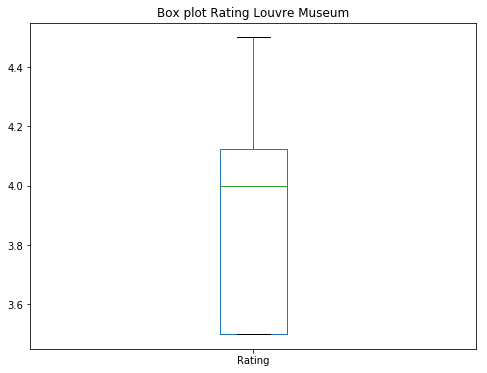

In [30]:
df_LM = df_merge.loc[df_merge['site'] == 'Louvre Museum']
df_LM['Rating'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot Rating Louvre Museum')
plt.show()

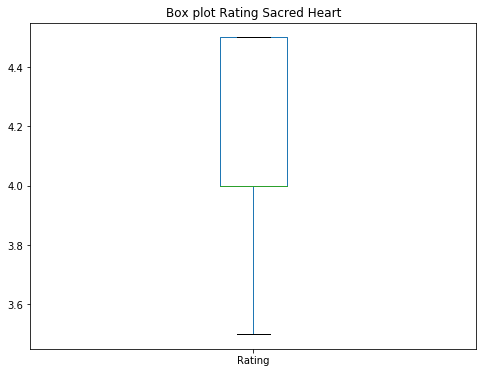

In [31]:
df_ND = df_merge.loc[df_merge['site'] == 'Sacred Heart']
df_ND['Rating'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot Rating Sacred Heart')
plt.show()

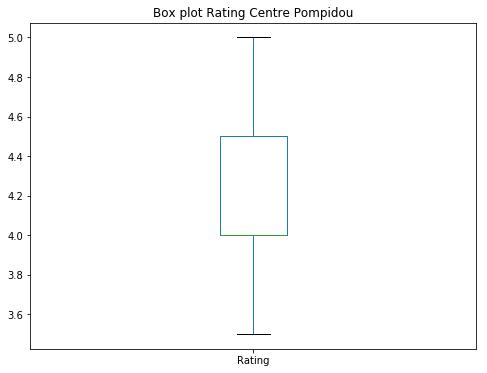

In [32]:
df_CP = df_merge.loc[df_merge['site'] == 'Centre Pompidou']
df_CP['Rating'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot Rating Centre Pompidou')
plt.show()

## WordCloud
Finally we offer as we have the information a wordcloud representation of the comments collected via TripAdvisor: 

In [33]:
DF_text = df_kaggle.copy()

In [34]:
DF_text.dropna(subset=['Reviews'], inplace=True)

In [35]:
DF_text.head()

,Name,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews
0,LA MEDUSE,Paris,"['French', 'Seafood', 'European', 'Vegetarian ...",1.0,5.0,45.0,178.0,"You can't figure out from the outside the..., ..."
1,LE CAPPIELLO,Paris,"['French', 'Mediterranean', 'European', 'Conte...",2.0,5.0,45.0,208.0,"Incredible!', 'Amazing food, wonderful atmosph..."
2,ASPIC,Paris,['French'- 'European'- 'Contemporary'],3.0,5.0,70.0,427.0,"Second time and just as good', 'Best dinner in..."
3,LES APOTRES DE PIGALLE,Paris,"['South American', 'Brew Pub', 'European', 'Ve...",4.0,5.0,45.0,1152.0,"Wonderful culinary experience', 'Must go resta..."
4,EPICURE,Paris,['French'- 'European'- 'Vegetarian Friendly'- ...,5.0,5.0,70.0,2305.0,"Very nice place', 'Speechless',"


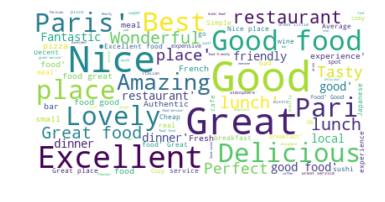

In [39]:
# Start with one review:
text = " ".join(review for review in DF_text.Reviews)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()